# MHML: Data analysis and machine learning

## Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import sys

## 1. Introduction to the dataset

The data is collected by a hardware sensor package and user inputs into a unity app. The data also holds information about the user, howerver this data is not being used in the initial phases of the projects.
At each time stamp the following is reccorded: 
- Time (Continuous variable, unit: seconds, format: unix time)
- Heart rate (Continuous variable, unit: , format: float, value range:0-1.5 )
- Galvanic Skin Resistance (Continuous variable, unit: , format: float, value range: 0-1.5)
- Self reported anxiety level (Continuous variable, unit: NA , format: float, value range: 0-1)
- Self reported stress level (Continuous variable, unit: NA , format: float, value range: 0-1)
- Self reported tired level (Continuous variable, unit: NA , format: float, value range: 0-1)
- Self reported productivity level (Continuous variable, unit: NA , format: float, value range: 0-1)

The following information reccorded about the specific app user:
- Name (Continuous variable, format: String)
- Age (Continuous variables, unit: Years, format: integer)
- Gender (Cathegorical variable, unit: , format: binary (1-0))
- Location (Continuous variables, unit: Lat/Long , format: float)
- Occupation (Cathegorical variable, unit: NA , format: String, possible values: 'Student, 'Graduate'...)

In [2]:
import json
import requests
import pandas as pd
import numpy as np

r = requests.get('http://mhml.greenberg.io/api/users/')
usernames = json.loads(r.text)['usernames']

usernames = [u'Anna', u'Felix', u'Jacopo', u'LeCao', u'Mohy', u'Scott']

df = pd.DataFrame(columns=['anxiety','fatigue','productivity','stress', 'heartRate', 'interbeatInterval', 'spO2', 'scl'])

for username in usernames:
    r = requests.get('http://mhml.greenberg.io/api/users/{}'.format(username))    
    r = requests.get('http://mhml.greenberg.io/api/users/{}/sessions'.format(username))
    sessions = json.loads(r.text)['session_ids']
    
    df_temp_user = pd.DataFrame(columns=['anxiety','fatigue','productivity','stress', 'heartRate', 'interbeatInterval', 'spO2', 'scl'])

    for session in sessions:
        
        r = requests.get('http://mhml.greenberg.io/api/users/{}/sessions/{}'.format(username, session))
        session_obj = json.loads(r.text)
        anxiety = session_obj['self_reported']['anxiety']
        fatigue = session_obj['self_reported']['fatigue']
        productivity = session_obj['self_reported']['productivity']
        stress = session_obj['self_reported']['stress']
        heart_rate = np.mean(list(session_obj['ppg']['heartRate'].values()))
        interbeat_interval = np.mean(list(session_obj['ppg']['interbeatInterval'].values()))
        spO2 = np.mean(list(session_obj['ppg']['spO2'].values()))
        scl = np.mean(list(session_obj['gsr']['scl'].values()))
        
        df_temp = pd.DataFrame(columns=['anxiety','fatigue','productivity','stress', 'heartRate', 'interbeatInterval', 'spO2', 'scl'])
        df_temp.loc[0] = pd.Series(
                        {'anxiety': anxiety,
                        'fatigue': fatigue,
                        'productivity': productivity,
                        'stress':stress,
                        'heartRate': heart_rate,
                        'interbeatInterval':interbeat_interval,
                        'spO2':spO2,
                        'scl': scl
                        }
                    )
        #print df_temp
        
        df_temp_user = df_temp_user.append(df_temp) 
    
    df = df.append(df_temp_user)
        
df.head()

    

/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,anxiety,fatigue,productivity,stress,heartRate,interbeatInterval,spO2,scl
0,0.797295,0.000000,0.000000,0.385579,100.0,25.0,97.151276,421.239130
0,0.772360,0.174696,0.100308,0.537600,100.0,25.0,95.252374,332.111111
0,0.447717,0.194393,0.110634,0.557278,100.0,25.0,95.626202,12.761905
0,0.541809,0.097020,0.157148,0.643114,100.0,25.0,97.449062,50.944444
0,0.514933,0.140611,0.092036,0.723868,100.0,25.0,98.131058,14.333333


In [5]:

import json
import requests
import pandas as pd

r = requests.get('http://mhml.greenberg.io/api/users/')
usernames = json.loads(r.text)['usernames']
print(usernames)
usernames = [u'Mohy']
print(usernames)

df_mohy = pd.DataFrame(columns=['anxiety','fatigue','productivity','stress', 'heartRate', 'interbeatInterval', 'spO2', 'scl'])

for username in usernames:
    print(username)
    r = requests.get('http://mhml.greenberg.io/api/users/{}'.format(username))
#     print(json.loads(r.text))
    
    r = requests.get('http://mhml.greenberg.io/api/users/{}/sessions'.format(username))
    sessions = json.loads(r.text)['session_ids']
    
    df_temp_user = pd.DataFrame(columns=['anxiety','fatigue','productivity','stress', 'heartRate', 'interbeatInterval', 'spO2', 'scl'])

    
    for session in sessions:
        
        r = requests.get('http://mhml.greenberg.io/api/users/{}/sessions/{}'.format(username, session))
        session_obj = json.loads(r.text)
        # print session_obj
        
        anxiety = session_obj['self_reported']['anxiety']
        fatigue = session_obj['self_reported']['fatigue']
        productivity = session_obj['self_reported']['productivity']
        stress = session_obj['self_reported']['stress']
        heart_rate = np.mean(list(session_obj['ppg']['heartRate'].values()))
        interbeat_interval = np.mean(list(session_obj['ppg']['interbeatInterval'].values()))
        spO2 = np.mean(list(session_obj['ppg']['spO2'].values()))
        scl = np.mean(list(session_obj['gsr']['scl'].values()))
        
        
        df_temp = pd.DataFrame(columns=['anxiety','fatigue','productivity','stress', 'heartRate', 'interbeatInterval', 'spO2', 'scl'])
        df_temp.loc[0] = pd.Series(
                        {'anxiety': anxiety,
                        'fatigue': fatigue,
                        'productivity': productivity,
                        'stress':stress,
                        'heartRate': heart_rate,
                        'interbeatInterval':interbeat_interval,
                        'spO2':spO2,
                        'scl': scl
                        }
                    )
        #print df_temp
        
        df_temp_user = df_temp_user.append(df_temp) 
    
    df_mohy = df_mohy.append(df_temp_user)
    
    
    
df_mohy.head()

[u'Anna', u'Felix', u'Jacopo', u'LeCao', u'Mee7a', u'Mohy', u'Scott', u'hello', u'khangle27', u'leahiscool', u'scottin']
[u'Mohy']
Mohy


,anxiety,fatigue,productivity,stress,heartRate,interbeatInterval,spO2,scl
0,0.177763,0.127140,0.000000,0.224365,34.263158,9.822368,97.232393,1344.763158
0,0.111682,0.224350,0.000000,0.401138,82.262295,24.836066,97.775130,874.918033
0,0.147896,0.144766,0.009258,0.134450,79.315789,25.000000,96.185505,726.973684
0,0.000000,0.150987,0.132361,0.188169,80.321429,24.839286,96.256979,777.607143
0,0.076545,0.109618,0.110656,0.143759,77.057143,25.000000,98.654152,868.885714


## 2. Exploratory data analysis

The exploratory analysis should provide an answer to the following questions:
- What does the data look like?
- How are the numerical variables distributed? 
- Are there any outliers?
- Are there any key correlations?
- How are we treating categorical variables? 
- What are the most important factors?
- Are there any interesting correlations that should be explored later? 
The exploratory analysis should also allow us to determine a set of potential variables that could be used to train our models. We should also identify any inherent limitations of the data.


### 2.1 Histograms: Examining data distribution

Scatter plots were produced to expore correlations between the continuous variables: GSR, heart rate and self reported stress level.

<Figure size 1080x1440 with 0 Axes>

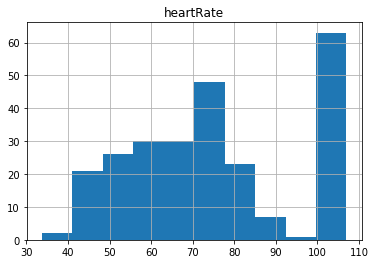

<Figure size 1080x1440 with 0 Axes>

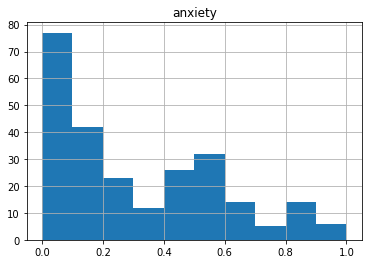

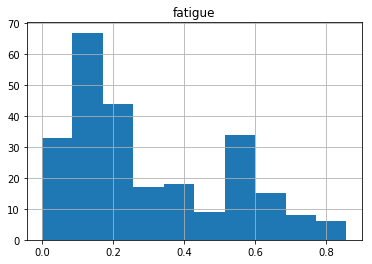

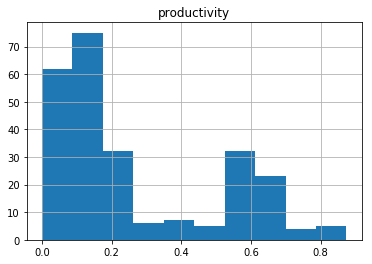

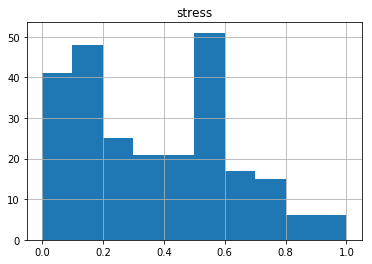

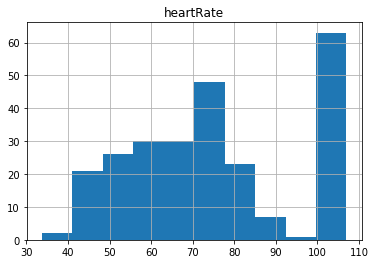

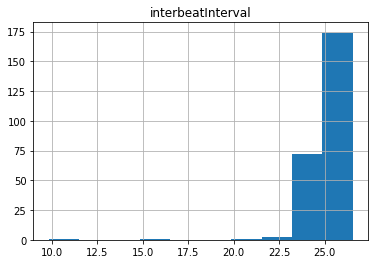

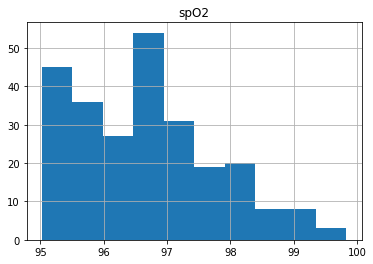

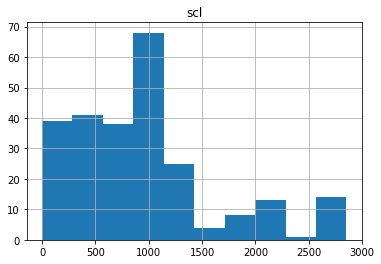

In [65]:
cat_variables = []
cont_variables = []

def make_violin_plot(data):
    #data.drop(train.columns[0], axis=1, inplace=True) # dropping ID

    column_list = list(data.columns)
    #column_list.remove('diagnosis')

    mainfig = plt.figure(figsize=(15,20))
    i = 1
    for column in column_list:
        ax = mainfig.add_subplot(6,5,i)
        sns.violinplot(x = column, y = 'diagnosis', data = data, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Diagnosis')
        i = i+1
        
    return mainfig

# make_violing_plot(data)

def make_histogram(data):
    
    columns=['anxiety','fatigue','productivity','stress', 'heartRate', 'interbeatInterval', 'spO2', 'scl']
    
    #column_list = list(data.columns)
    mainfig = plt.figure(figsize=(15,20))
    i = 1
    
    for column in columns:
        #ax = mainfig.add_subplot(4,4,i) 
        ax = df.hist(column)
        
        #n, bins, patches = ax.hist(data[column], bins = 50)
        #ax.set_xlabel(column)
        #ax.set_ylabel('Frequency')
        i = i+1
        
    #data.hist(column='tired')

    #data.drop(train.columns[0], axis=1, inplace=True)
    #columns = list(train.columns)
    #columns.remove('diagnosis')
    return mainfig

df.hist('heartRate')

make_histogram(df)
   



### 2.2 Scatter plots: Exploring possible correlations between continuous variables

Scatter plots were produced to expore correlations between the continuous variables: GSR, heart rate and self reported stress level.

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


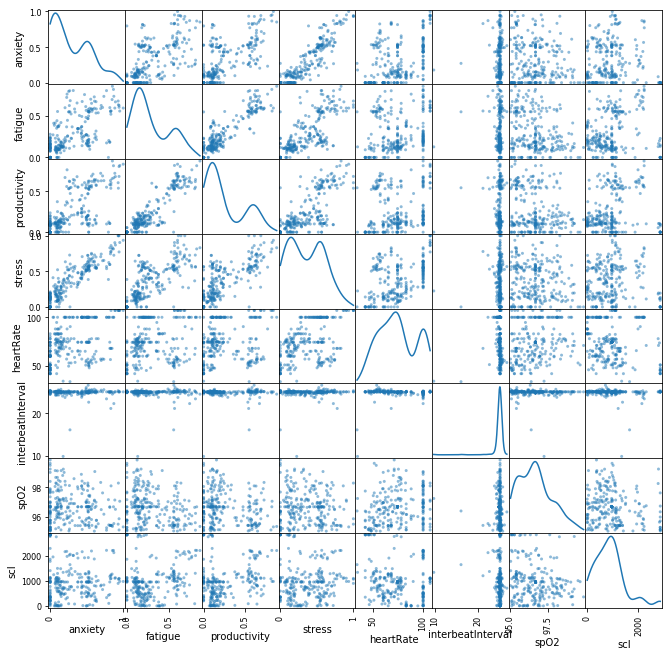

In [64]:
def make_scatter_plot(data):
    
    #data.drop(data.columns[Cathegorical variables], axis=1, inplace=True) 
    fig = pd.scatter_matrix(data, diagonal = 'kde', figsize = (11,11))

make_scatter_plot(df)

In [29]:
print df.shape

(251, 8)


## 3. Predictive

The goals of the machine learning is to use the sensor data and self reported user metrics to determine the stress level of user (self reported in the app). Possible variables include: Time, heart rate, galvanic skin resistance, anxiety level, stress level, tired level, productivity level. 

This machine learning problem can be tackled as a <b> classification or regression problem </b> depending on how the 'stress' user input is handled. It can be preprocessed to become a binary value (relaxed, stressed), or kept as a float.

<font color=blue> <b>  Model input: </b> </font> Time, heart rate, galvanic skin resistance, anxiety level, stress level, tired level, productivity level <br>
<font color=red> <b>  Model output: </b> </font> Stress level indicator (type: float, value range: 0-1)
<br>
<br>
The <b> stress level </b> indicator is then used to suggest, if needed, a calming exercise or activity. 



[0.85924384 0.04439251 0.01836121 0.04587909 0.0052967  0.01058448
 0.01624218]


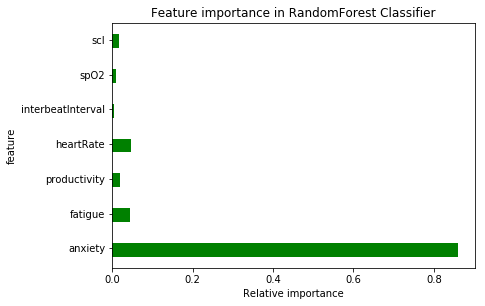

<Figure size 360x360 with 0 Axes>

In [90]:
# PRIMITIVE MODEL Random Forest Regression

df.fillna(df.mean(), inplace= True)
df.fillna('non', inplace=True)

y = df['stress']  # isolate the 'stressed' column
X = df.drop('stress', axis=1)  # dropping 'stress' coeficient

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature scaling (if needed, and not done earlier by back-end)
"""
        from sklearn.preprocessing import StandardScaler
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        sc_y = StandardScaler()
        y_train = sc_y.fit_transform(y_train)"""

        # Fit model to up to date user data
from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
Regressor.fit(X_train, y_train)

print Regressor.feature_importances_

col = list(X_test)
y = Regressor.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

In [10]:
feature_list = list(X_test)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
import graphviz
# Pull out one tree from the forest
tree = Regressor.estimators_[2]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

#### Visualizing the decision tree
<img src="mohy_tree.png">

In [83]:
# Use the forest's predict method on the test data
predictions = Regressor.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 0.05, 'degrees.')


### 3.1 Building user specific models

#### Sample use: Mohy

In [6]:
# USER MODEL Random Forest Regression

df_mohy.fillna(df_mohy.mean(), inplace= True)
df_mohy.fillna('non', inplace=True)

y = df_mohy['stress']  # isolate the 'stressed' column
X = df_mohy.drop('stress', axis=1)  # dropping 'stress' coeficient

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature scaling (if needed, and not done earlier by back-end)
"""
        from sklearn.preprocessing import StandardScaler
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        sc_y = StandardScaler()
        y_train = sc_y.fit_transform(y_train)"""

        # Fit model to up to date user data
from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
Regressor.fit(X_train, y_train)

print Regressor.feature_importances_
    

[0.49636823 0.1664053  0.03367336 0.21192892 0.01322852 0.04023449
 0.03816117]


/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Evalauting model accuracy:

('Mean Absolute Error:', 0.05, 'degrees.')


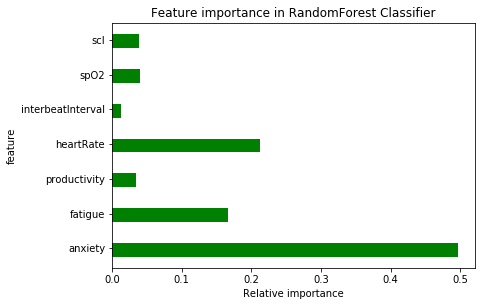

<Figure size 360x360 with 0 Axes>

In [9]:
# Use the forest's predict method on the test data
predictions = Regressor.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


feature_list = list(X_test)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
import graphviz
# Pull out one tree from the forest
tree = Regressor.estimators_[2]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('mohy_tree.png')

#modelname.feature_importance_
col = list(X_test)
y = Regressor.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

#### Visualizing the decision tree
<img src="mohy_tree.png">

## 4. Saving models


In [ ]:
def save_model():
    
    import pickle

    #creating and training a model
    regr = linear_model.LinearRegression()
    regr.fit(features, label)

    #serializing our model to a file called model.pkl
    pickle.dump(regr, open("model.pkl","wb"))

def load_model(): 
    #loading a model from a file called model.pkl
    model = pickle.load(open("model.pkl","r"))